# Lab 15: Neural Networks for Handwritten Digit Recognition, Multiclass

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
# %matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from lib.autils import *
from lib.lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

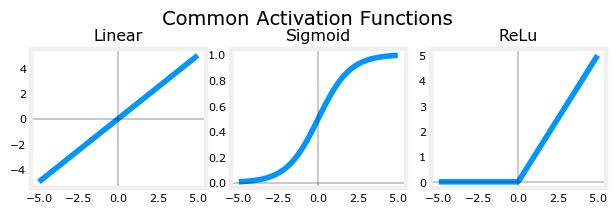

In [4]:
plt_act_trio()

## NumPy implementation of the softmax function

In [9]:
# Setup input data
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)

print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


In [10]:
# NumPy implementation of the softmax function
# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ### 
    
    #element-wise exponenial
    ez = np.exp(z)              
    a = ez/np.sum(ez)
    
    
    ### END CODE HERE ### 
    return a

In [11]:
# test the custom function
test_my_softmax(my_softmax)

 All tests passed.


## Playing with Softmax

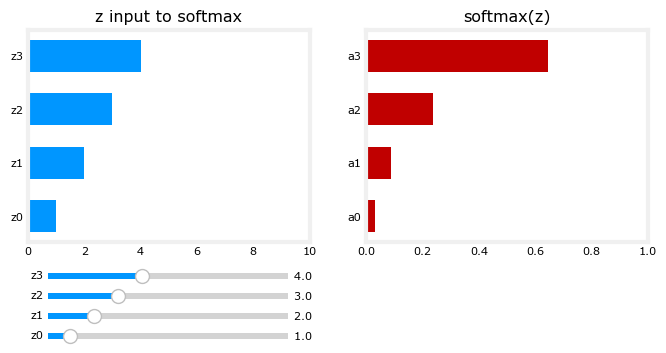

In [12]:
plt.close("all")
plt_softmax(my_softmax)

## Load and inspect hand-written data

The data set contains 5000 training examples of handwritten digits.

Inputs
* Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
* Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
* The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector.
* Each training examples becomes a single row in our data matrix X.
* This gives us a 5000 x 400 matrix X where every row is a training example of a handwritten digit image.

Labelled outputs
* The second part of the training set is a 5000 x 1 dimensional vector y that contains labels for the training set
y = 0 if the image is of the digit 0, y = 4 if the image is of the digit 4 and so on.

In [55]:
X, y = load_data()

print ('The first element of X is: ', X[0])
print ('The last element of X is: ', X[-1])

print ('The nested first element of y is: ', y[0,0])
print ('The nested last element of y is: ', y[-1,0])

print ('The entire first element of y is: ', y[0])
print ('The entire last element of y is: ', y[-1])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [56]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


## Visualize the data

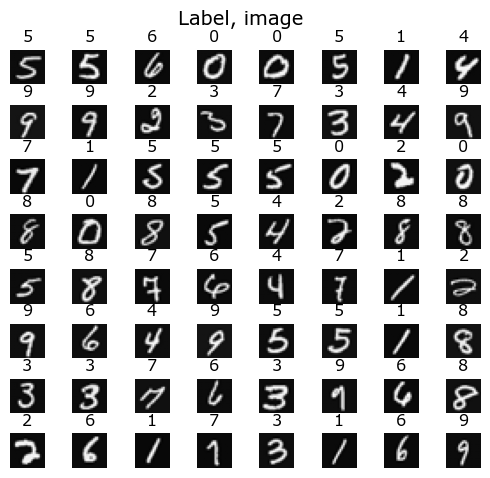

In [57]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

## Design the Model

Inputs: Each example has 400 elements (because 20x20 pixels).

Layers
* Layer 1: 25 units, ReLU
* Layer 2: 15 units, ReLU
* Layer 3: 10 units, Linear  # 10 units because 10 classes: 0, 1, 2, 3, 4, 5, 6, 7, 8 ,9

The layers are followed by a softmax function to calculate the probabilities per example and per each class.


Shapes of weights and biases:
* Layer 1: The shape of W1 is (400, 25) and the shape of b1 is (25,)
* Layer 2: The shape of W2 is (25, 15) and the shape of b2 is: (15,)
* Layer3: The shape of W3 is (15, 10) and the shape of b3 is: (10,)
* The bias vector b could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention:

NB: Tensorflow models are built layer by layer. A layer's input dimensions are calculated for you. You specify a layer's output dimensions and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the model.fit statement:
`tf.keras.Input(shape=(400,)),    #specify input shape`

In [69]:
# using Keras Sequential model and Dense Layer with a ReLU activation to construct the three layer network described above
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(400,)),   # if this is not specified, tensorflow will not be able to calculate the number of weights and biases for each layer before built time
        Dense(25, activation='relu', name='L1'),
        Dense(15, activation='relu', name='L2'),
        Dense(10, activation='linear', name='L3'),
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

In [70]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# test_model(model, 10, 400)
# This passes in the tested notebook.

In [72]:
# Examine layers
[layer1, layer2, layer3] = model.layers

#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


## Compile and Fit

The first line, Epoch 1/40, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 5000 examples in our data set or roughly 157 batches. The notation on the 2nd line 157/157 [==== is describing which batch has been executed.

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # from_logits=True minimizes roundoff error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # adds Adam algorithm to make gradient descent faster
)


# Setting epochs=40 specifies that the entire data set should be applied during training 40 times.
history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 1.9508
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.6894
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.4269
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.3379
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.2894
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 0.2566
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.2315
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.2109
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.1940
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.1799
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.1686
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 0.1582
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.1487
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.1401
Epoch 15/40
157/157 ━━━━━━━━━

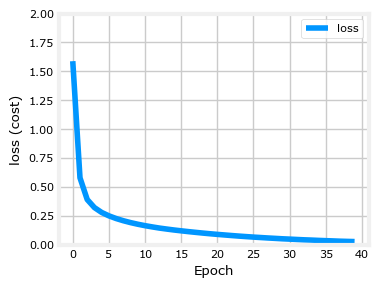

In [62]:
# Inspect the history
# The .fit method returns a variety of metrics including the loss. This is captured in the history variable above. This can be used to examine the loss in a plot as shown below.
# If the model has been trained multiple times, then the graph will look like a flat line because the cost/loss gets infintessimally small. The model re-optimizes every time you run it.

plot_loss_tf(history)

## Make predictions

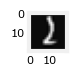

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
 predicting a Two: 
[[-9.06  5.53  7.27  2.77 -3.94 -8.4  -2.83  1.4  -4.13 -2.31]]
 Largest Prediction index: 2


In [63]:
# Select the 1015th input
image_of_two = X[1015]
display_digit(image_of_two)

# prediction
prediction = model.predict(image_of_two.reshape(1,400))  

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [64]:
# If you want to transform the vector of results into probabilities, use softmax.
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[6.81e-08 1.47e-01 8.41e-01 9.33e-03 1.14e-05 1.31e-07 3.47e-05 2.38e-03
  9.38e-06 5.83e-05]]
Total of predictions: 1.000


In [65]:
# To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy argmax function.
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

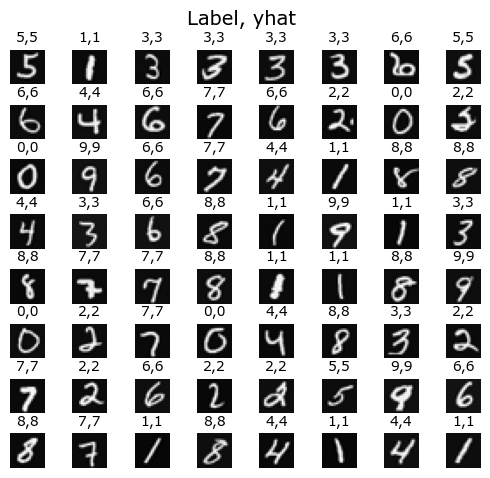

In [66]:
# Compare predictions to the labelled inputs for 64 training examples chosen at random.

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
15 errors out of 5000 images


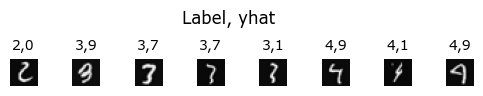

In [68]:
# Examine training examples where the model makes the wrong prediction
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

### Note: increasing the number of training epochs can eliminate the errors on this data set.